In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
esd = pd.read_csv('extended_salary_data.csv')
esd

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78
5,4.0,42801.56
6,2.1,35893.61
7,17.5,128071.22
8,12.4,95436.18
9,14.5,84869.60


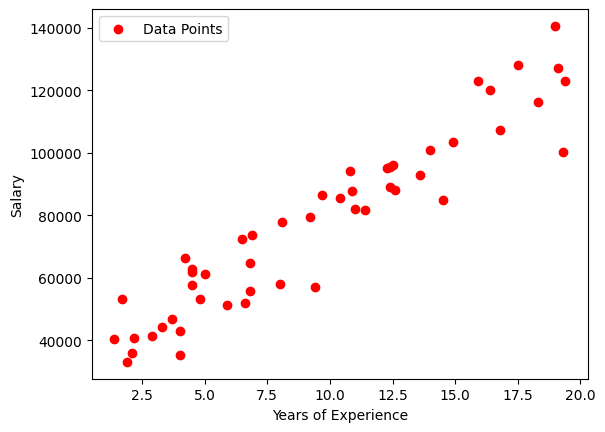

In [3]:
plt.scatter(esd['YearsExperience'],esd['Salary'],color = 'red', label = 'Data Points')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [4]:
esd.describe()

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


In [5]:
X = esd[['YearsExperience']]
y = esd['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope: 5004.555350123094
Intercept: 28650.426841904824


In [10]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 7210.391709536065
Mean Squared Error: 83238297.78817084


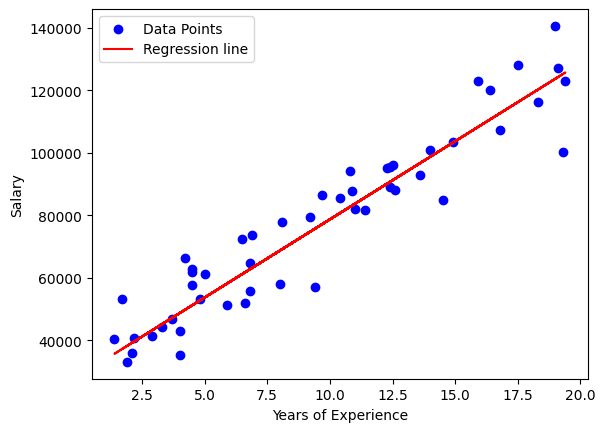

In [11]:
plt.scatter(esd['YearsExperience'],esd['Salary'],color = 'blue', label = 'Data Points')
plt.plot(esd['YearsExperience'],model.predict(esd[['YearsExperience']]),color = 'red', label = 'Regression line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [12]:
esd['NumProjectsCompleted'] = (esd['YearsExperience'] * 4 + np.random.randint(-2, 3, size = len(esd)))

In [13]:
X_new = esd[['YearsExperience', 'NumProjectsCompleted']]

In [14]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.2)


In [15]:
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

y_pred_new = model_new.predict(X_test_new)

In [17]:
mae_new = mean_absolute_error(y_test_new, y_pred_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)

In [18]:
print("Simple Linear Regression: ")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

print("\nMultiple Linear Regression: ")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

Simple Linear Regression: 
MAE: 7210.391709536065
MSE: 83238297.78817084

Multiple Linear Regression: 
MAE: 7210.391709536065
MSE: 83238297.78817084


In [19]:
from mpl_toolkits.mplot3d import Axes3D

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


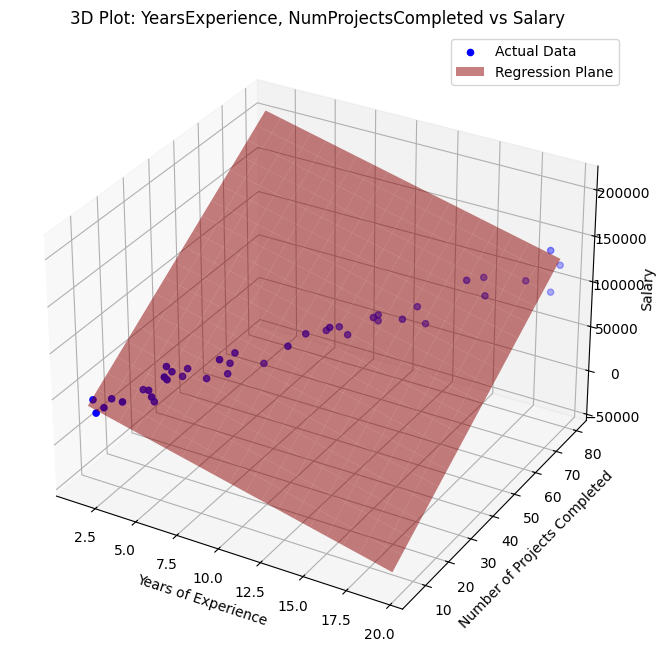

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_new["YearsExperience"], X_train_new["NumProjectsCompleted"], y_train_new, color='blue', label='Actual Data')
x_surf, y_surf = np.meshgrid(
    np.linspace(X_new["YearsExperience"].min(), X_new["YearsExperience"].max(), 20),
    np.linspace(X_new["NumProjectsCompleted"].min(), X_new["NumProjectsCompleted"].max(), 20)
)
z_surf = model_new.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Regression Plane')

ax.set_title("3D Plot: YearsExperience, NumProjectsCompleted vs Salary")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Number of Projects Completed")
ax.set_zlabel("Salary")
plt.legend()
plt.show()